# Composition of compendia

This notebook makes figures that illustrate the composition of the compendia. In particular this notebook takes metadata files (generated by Sam Neff from Dartmouth) and creates plots to show the different types of media used in experiments and what types of genetic malnipulations were used as well.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import plotnine as pn
import seaborn as sns
import matplotlib.pyplot as plt

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Import metadata files
pao1_metadata_filename = "PAO1TableVF1.csv"
pa14_metadata_filename = "PA14TableVF1.csv"

In [3]:
pao1_metadata = pd.read_csv(pao1_metadata_filename, header=0, index_col=0)
pa14_metadata = pd.read_csv(pa14_metadata_filename, header=0, index_col=0)

In [4]:
print(pao1_metadata.shape)
pao1_metadata.head(10)

(287, 8)


,Sample.ID,Medium,Perturbed.Gene,Gene.Function,KEGG.Pathway,Strain,StudyInGeo,GSEID
SRA.Study.ID,,,,,,,,
PRJEB14322,ERX1517774,Medium B,PA1421,(RefSeq) guanidinobutyrase,Arginine and proline metabolism,PAO1,N,NaN
PRJEB14322,ERX1517774,Medium B,PA1421,(RefSeq) guanidinobutyrase,Metabolic pathways,PAO1,N,NaN
PRJEB14322,ERX1517773,Medium B,None,NaN,NaN,PAO1,N,NaN
PRJEB18543,"ERX1819490, ERX1819489, ERX1819488, ERX1819487...",NaN,PA2492,(RefSeq) transcriptional regulator MexT,NaN,PAO1,N,NaN
PRJEB18543,"ERX1819481, ERX1819480, ERX1819479",NaN,None,NaN,NaN,PAO1,N,NaN
PRJEB21307,"ERX2068558, ERX2068557, ERX2068556",LB,PA2020,(RefSeq) transcriptional regulator,beta-Lactam resistance,PAO1,N,NaN
PRJEB21307,"ERX2068561, ERX2068560, ERX2068559",LB,None,NaN,NaN,PAO1,N,NaN
PRJEB36276,"ERX3834797, ERX3834796, ERX3834795, ERX3834794...",M9 Minimal Media,PA4266,(RefSeq) elongation factor G,NaN,PAO1,N,NaN
PRJEB36276,"ERX3834791, ERX3834790, ERX3834789",M9 Minimal Media,None,NaN,NaN,PAO1,N,NaN


In [5]:
print(pa14_metadata.shape)
pa14_metadata.head(10)

(127, 8)


,Sample.ID,Medium,Perturbed.Gene,Gene.Function,KEGG.Pathway,Strain,StudyInGeo,GSEID
SRA.Study.ID,,,,,,,,
PRJNA238222,"SRX470350, SRX470351, SRX470352, SRX470353, SR...",Other,PA0376,(RefSeq) RNA polymerase sigma factor RpoH,NaN,PA14,Y,GSE54999
PRJNA238222,"SRX470313, SRX470314, SRX470315, SRX470316, SR...",Other,PA0762,(RefSeq) RNA polymerase sigma factor AlgU,NaN,PA14,Y,GSE54999
PRJNA238222,"SRX470330, SRX470331, SRX470332, SRX470333, SR...",Other,PA1455,(RefSeq) flagellar biosynthesis sigma factor FliA,Two-component system,PA14,Y,GSE54999
PRJNA238222,"SRX470330, SRX470331, SRX470332, SRX470333, SR...",Other,PA1455,(RefSeq) flagellar biosynthesis sigma factor FliA,Biofilm formation - Pseudomonas aeruginosa,PA14,Y,GSE54999
PRJNA238222,"SRX470330, SRX470331, SRX470332, SRX470333, SR...",Other,PA1455,(RefSeq) flagellar biosynthesis sigma factor FliA,Flagellar assembly,PA14,Y,GSE54999
PRJNA238222,"SRX470372, SRX470373, SRX470374, SRX470375, SR...",Other,PA1776,(RefSeq) RNA polymerase sigma factor SigX,NaN,PA14,Y,GSE54999
PRJNA238222,"SRX470372, SRX470373, SRX470374, SRX470375, SR...",Other,PA1776,(RefSeq) RNA polymerase sigma factor SigX,NaN,PA14,Y,GSE54999
PRJNA238222,"SRX470344, SRX470345, SRX470346, SRX470347, SR...",Other,PA2426,(RefSeq) extracytoplasmic-function sigma-70 fa...,NaN,PA14,Y,GSE54999
PRJNA238222,"SRX470365, SRX470366, SRX470367, SRX470368, SR...",Other,PA3662,(RefSeq) hypothetical protein,NaN,PA14,Y,GSE54999


In [6]:
# TO DO
# Clean up values?
# Only plot the top 10
# Coloring
# Increase axis label
# Name axis "PAO1 compendium"

## Plot media distribution in PAO1 and PA14

Media will be at the study level

In [7]:
# Format dataframe
# Only keep first row
pao1_metadata_first = pao1_metadata[~pao1_metadata.index.duplicated(keep="first")]
pa14_metadata_first = pa14_metadata[~pa14_metadata.index.duplicated(keep="first")]

In [8]:
# Concatenate
both_metadata_first = pd.concat([pao1_metadata_first, pa14_metadata_first])

In [9]:
both_metadata_first_media = (
    both_metadata_first.groupby(["Strain", "Medium"])
    .size()
    .reset_index()
    .pivot(columns="Medium", index="Strain", values=0)
)

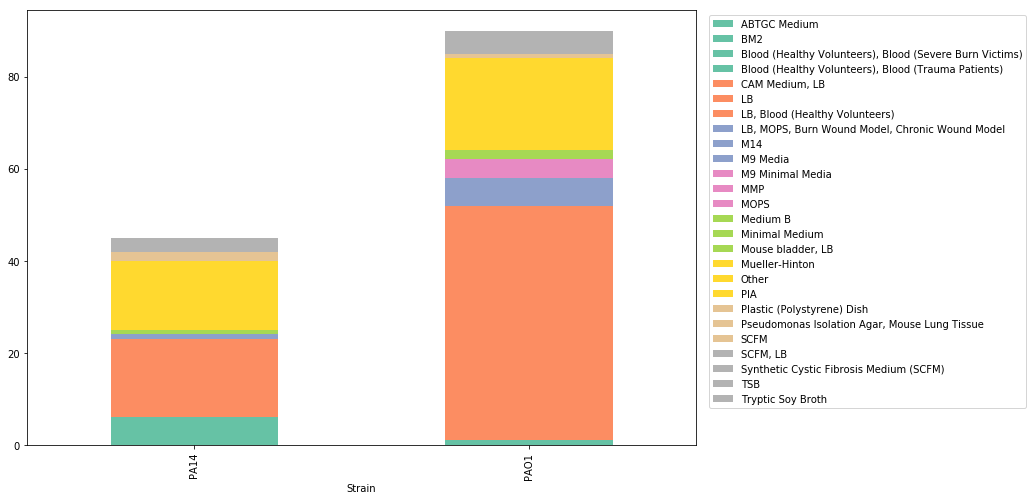

In [10]:
both_metadata_first_media.plot(
    kind="bar", stacked=True, colormap="Set2", figsize=(12, 8)
)
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper right", ncol=1)

## Plot Gene function distribution in PAO1 and PA14
Gene function will be at the study level as well since the gene will be the same

In [11]:
# Format
both_metadata_first_function = (
    both_metadata_first.groupby(["Strain", "Gene.Function"])
    .size()
    .reset_index()
    .pivot(columns="Gene.Function", index="Strain", values=0)
)

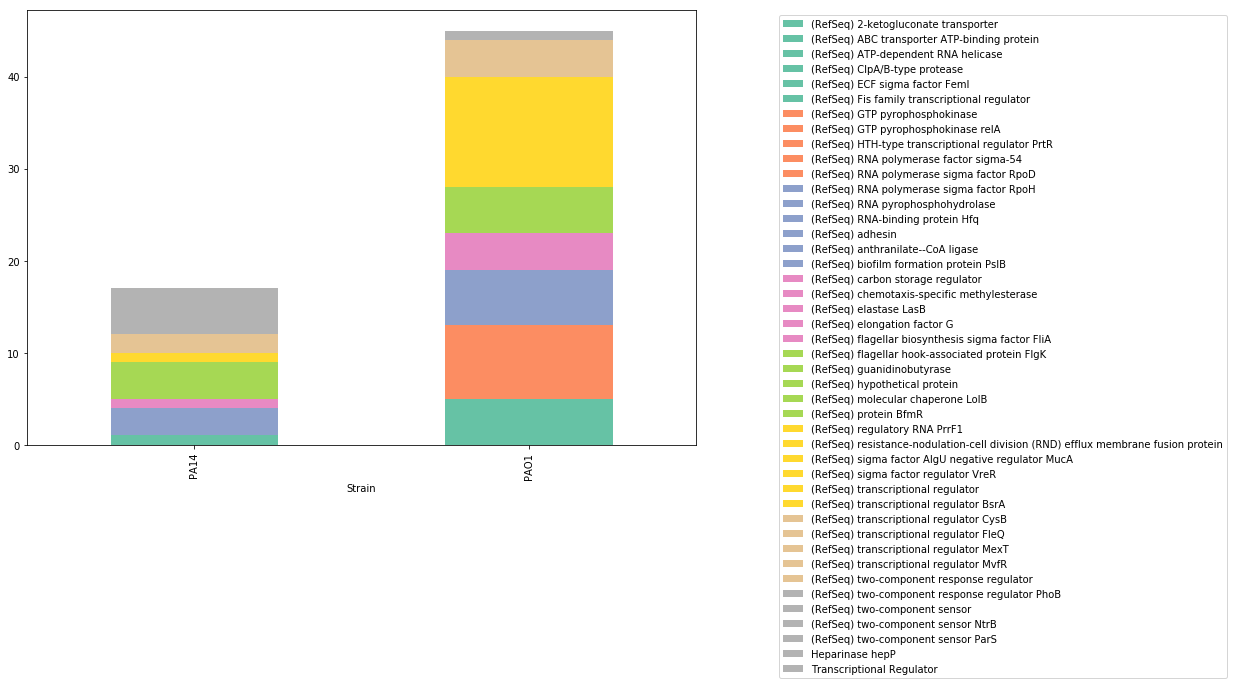

In [12]:
both_metadata_first_function.plot(
    kind="bar", stacked=True, colormap="Set2", figsize=(12, 8)
)
plt.legend(bbox_to_anchor=(1.8, 1), loc="upper right", ncol=1)

## Plot pathways associated with perturbed gene

There are 3 possible reasons that the value = Nan:
1. The sample was a control sample
2. The perturbed gene was not found to be associated to a pathway due to limitations in annotation information
3. The experimental design was not performing a genetic malnipulation

In [13]:
# Format dataframe so that the only row with NaN corresponds to study where
# they did not perform a genetic malnipulation and so "Perturbed.Gene" = None

In [14]:
# Concatenate
both_metadata_all = pd.concat([pao1_metadata, pa14_metadata])

In [15]:
both_metadata_kegg = (
    both_metadata_all.groupby(["Strain", "KEGG.Pathway"])
    .size()
    .reset_index()
    .pivot(columns="KEGG.Pathway", index="Strain", values=0)
)

In [17]:
both_metadata_kegg

KEGG.Pathway,ABC transporters,Amino sugar and nucleotide sugar metabolism,Arginine and proline metabolism,Bacterial chemotaxis,Bacterial secretion system,Biofilm formation - Pseudomonas aeruginosa,Biosynthesis of nucleotide sugars,Biosynthesis of secondary metabolites,Cationic antimicrobial peptide (CAMP) resistance,Flagellar assembly,Fructose and mannose metabolism,Metabolic pathways,O-Antigen nucleotide sugar biosynthesis,Phenazine biosynthesis,Purine metabolism,Quorum sensing,RNA degradation,Transcription factors,Two-component system,beta-Lactam resistance
Strain,,,,,,,,,,,,,,,,,,,,
PA14,NaN,NaN,NaN,2.0,NaN,9.0,NaN,1.0,1.0,12.0,NaN,NaN,NaN,1.0,NaN,5.0,NaN,1.0,19.0,NaN
PAO1,4.0,1.0,1.0,NaN,1.0,20.0,1.0,1.0,4.0,7.0,1.0,6.0,1.0,NaN,4.0,9.0,6.0,NaN,21.0,8.0


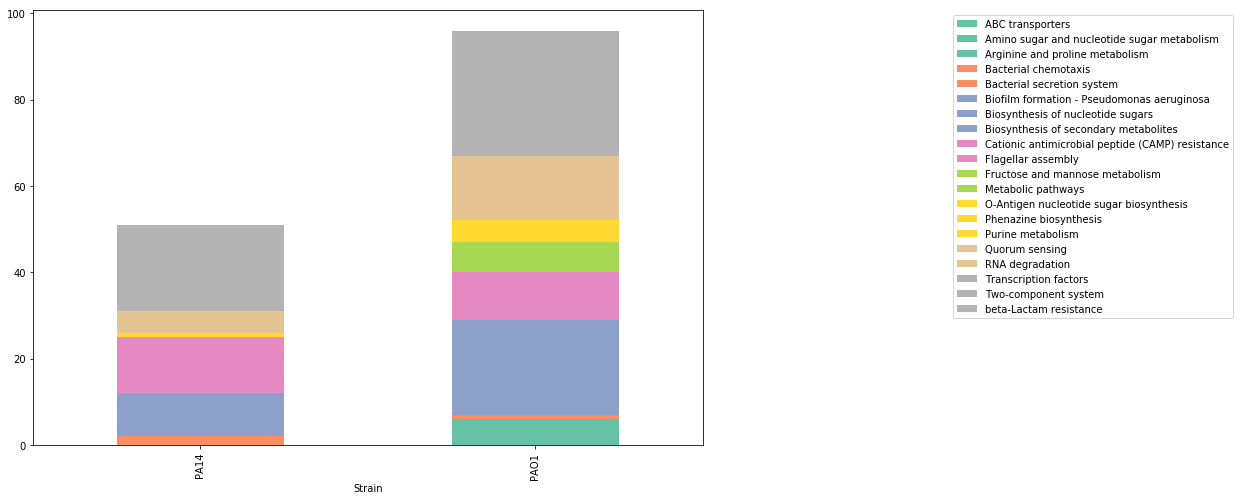

In [16]:
both_metadata_kegg.plot(kind="bar", stacked=True, colormap="Set2", figsize=(12, 8))
plt.legend(bbox_to_anchor=(1.8, 1), loc="upper right", ncol=1)

In [ ]:
# Save plots